In [2]:
# from __future__ import print_function, division

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
%matplotlib inline

# Part 1

In [4]:
# TODO define gaussian function here
def gaussian(x, sigma):
    return np.exp(-(x**2)/(2*sigma**2))

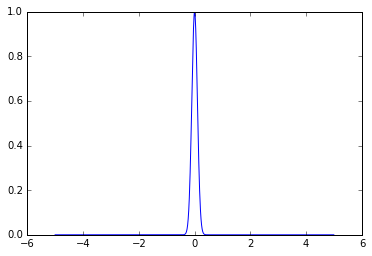

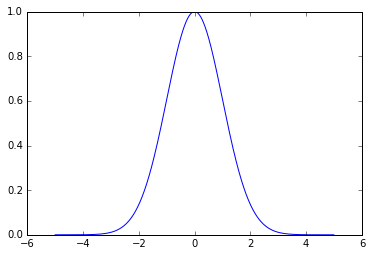

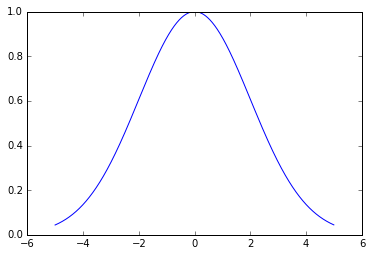

In [5]:
# TODO plot gaussians here
x = np.arange(-5, 5, 0.01)
sigma = [0.1, 1, 2]
for i in range(len(sigma)): 
    plt.plot(x, gaussian(x, sigma[i]))
    plt.show()

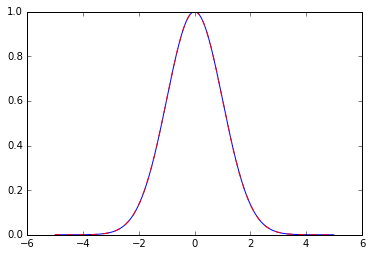

In [6]:
# TODO fit gaussians, with known parameters, here
# in this case, known parameter is sigma = 1 

params, cov = optimize.curve_fit(gaussian, x, gaussian(x, 1))

# TODO plot result
plt.plot(x, gaussian(x, *params))
plt.plot(x, gaussian(x, 1), color = "red", linestyle = "dashed")

# the fits are identical, since we know the parameter sigma = 1! 

In [7]:
# TODO: load data here
data = np.loadtxt("HDalpha_data")
print(data.shape) # sanity check: the dimensions match with our expectations

(122, 2)


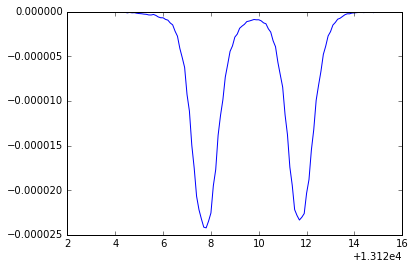

In [8]:
# TODO: plot it
plt.plot(data[:, 0], data[:, 1])

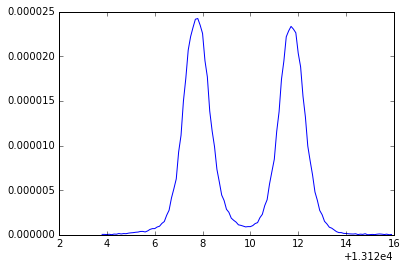

In [9]:
# TODO: plot data as emission signal
plt.plot(data[:, 0], -1*data[:, 1])

[ -2.42192883e-05   7.75562112e+00  -2.32951579e-05   1.17281977e+01
   5.56265655e-01   5.44989456e-01]


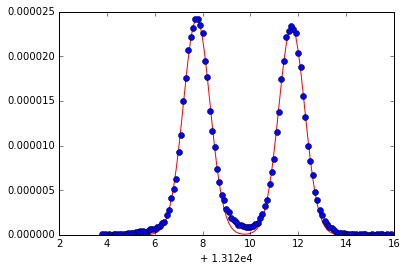

In [30]:
# shift data so x-axis is easier to work with 
x_data = data[:, 0] - 1.312e4

# TODO: fit a function to this data and plot it
def double_gaussian(x, a, b, c, d, sigma_1, sigma_2):
    return a*np.exp(-((x - b)**2)/(2*sigma_1**2)) + c*np.exp(-((x - d)**2)/(2*sigma_2**2))

#y_data = double_gaussian(data[:, 0], .00025, 8e4, .00025, 12e4, 1e4, 1e4)

params_2, cov_2 = optimize.curve_fit(double_gaussian, x_data, data[:, 1], p0 = (.000025, 8, .000025, 12, 4, 3))
print(params_2)

plt.plot(x_data, -1*double_gaussian(x_data, *params_2), color="red")
plt.plot(x_data, -1*data[:,1], "o")
plt.xlabel("+ 1.312e4")

# Part 2

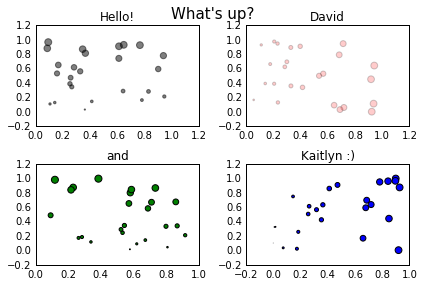

In [31]:
# TODO: part 2
x_1 = np.random.rand(100,)
x_2 = np.random.rand(100,)

f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
ax0.scatter(x_1[:25], x_2[:25], s=x_2[:25]*50, c="black", alpha="0.5")
ax0.tick_params(bottom="off", top="off", left="off", right="off")
ax0.set_title("Hello!")
ax1.scatter(x_1[25:50], x_2[25:50], s=x_1[25:50]*50, c="red", alpha="0.2")
ax1.set_title("David")
ax1.tick_params(bottom="off", top="off", left="off", right="off")
ax2.scatter(x_1[50:75], x_2[50:75], s=x_2[50:75]*50, c="green")
ax2.set_title("and")
ax2.tick_params(bottom="off", top="off", left="off", right="off")
ax3.scatter(x_1[75:100], x_2[75:100], s=x_1[75:100]*50)
ax3.tick_params(bottom="off", top="off", left="off", right="off")
ax3.set_title("Kaitlyn :)")
plt.suptitle("What's up?", fontsize=15)
plt.tight_layout()

# Part 3

In [12]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

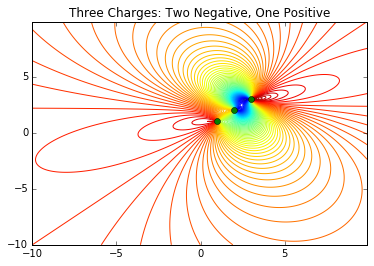

In [17]:
# TODO create arrays of information
x = [1, 2, 3]
y = [1, 2, 3]
q = [-1, -2, 3]

#X = np.arange(-31.5, 31.5)
#Y = np.arange(-31.5, 31.5)

# I adjusted the range so the region of particle interaction is more visible 
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)

# TODO get flux
flux = flux_for_dipole(x, y, q, X, Y)

# TODO plot contours of the flux
plt.contour(X, Y, flux, 100)
plt.plot(x, y, "o", color="green")
plt.title("Three Charges: Two Negative, One Positive")

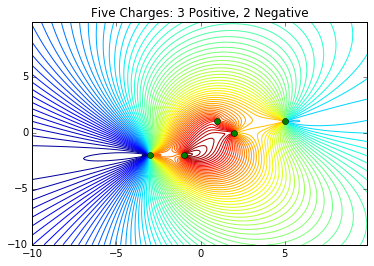

In [19]:
# TODO create arrays of information
x = [1, 2, -1, 5, -3]
y = [1, 0, -2, 1, -2]
q = [-1, -3, 3, -5, 10]

#X = np.arange(-31.5, 31.5)
#Y = np.arange(-31.5, 31.5)

X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)

# TODO get flux
flux = flux_for_dipole(x, y, q, X, Y)

# TODO plot contours of the flux
plt.contour(X, Y, flux, 100)
plt.plot(x, y, "o", color="green")
plt.title("Five Charges: 3 Positive, 2 Negative")

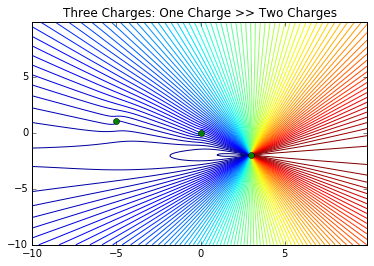

In [32]:
# spread out charges, one charge >> two other charges  
# TODO create arrays of information
x = [-5, 0, 3]
y = [1, 0, -2]
q = [-.1, -.2, 10]

#X = np.arange(-31.5, 31.5)
#Y = np.arange(-31.5, 31.5)

X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)

# TODO get flux
flux = flux_for_dipole(x, y, q, X, Y)

# TODO plot contours of the flux
plt.contour(X, Y, flux, 100)
plt.plot(x, y, "o", color="green")
plt.title("Three Charges: One Charge >> Two Charges")